In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data

dirty = pd.read_csv('../data/raw/cat_breeds_dirty.csv', sep=';')
clean = pd.read_csv('../data/raw/cat_breeds_clean.csv', sep=';')

In [3]:
# Quick look

print(dirty.head())

    Breed  Age_in_years  Age_in_months  Gender Neutered_or_spayed  \
0  Angora          0.25            3.0  female              False   
1  Angora          0.33            4.0    male              False   
2  Angora          0.50            NaN     NaN              False   
3  Ankora          0.50            NaN     NaN              False   
4  Angora          0.50            NaN     NaN                NaN   

   Body_length  Weight          Fur_colour_dominant Fur_pattern Eye_colour  \
0         19.0     2.0                        white       solid       blue   
1         19.0     2.5                        white       solid       blue   
2         20.0     2.8  what does it mean dominant?       solid      green   
3         21.0     3.0                        white       dirty       blue   
4         21.0     3.0                    red/cream       tabby      green   

                       Allowed_outdoor Preferred_food  \
0                                FALSE            wet   
1 

In [5]:
# Quick look

print(clean.head())

    Breed  Age_in_years  Age_in_months  Gender  Neutered_or_spayed  \
0  Angora          0.25              3  female               False   
1  Angora          0.33              4    male               False   
2  Angora          0.50              6    male               False   
3  Angora          0.50              6  female               False   
4  Angora          0.50              6    male               False   

   Body_length  Weight Fur_colour_dominant Fur_pattern Eye_colour  \
0           19     2.0               white       solid       blue   
1           19     2.5               white       solid       blue   
2           20     2.8               black       solid      green   
3           21     3.0               white       solid       blue   
4           21     3.0           red/cream       tabby      green   

   Allowed_outdoor Preferred_food  Owner_play_time_minutes  Sleep_time_hours  \
0            False            wet                       46                16   
1   

In [6]:
# EDA: missing values, value ranges, unique breeds, etc.

print(dirty.isnull().sum())
print(dirty['Breed'].unique())

Breed                      112
Age_in_years                31
Age_in_months               37
Gender                      67
Neutered_or_spayed          53
Body_length                 26
Weight                      26
Fur_colour_dominant         13
Fur_pattern                 48
Eye_colour                  39
Allowed_outdoor             43
Preferred_food              21
Owner_play_time_minutes     21
Sleep_time_hours            41
Country                     75
Latitude                    61
Longitude                   61
dtype: int64
['Angora' 'Ankora' nan 'angora' 'Angorra' 'My coon' 'Maine coon'
 'Maine loon' 'maine coon' 'ragdoll' 'Ragdoll' 'rack doll' 'wrack doll']


In [7]:
# Compare with clean data

print(clean.isnull().sum())
print(clean['Breed'].unique())

Breed                      0
Age_in_years               0
Age_in_months              0
Gender                     0
Neutered_or_spayed         0
Body_length                0
Weight                     0
Fur_colour_dominant        0
Fur_pattern                0
Eye_colour                 0
Allowed_outdoor            0
Preferred_food             0
Owner_play_time_minutes    0
Sleep_time_hours           0
Country                    0
Latitude                   0
Longitude                  0
dtype: int64
['Angora' 'Maine coon' 'Ragdoll']


# EDA Visualizations

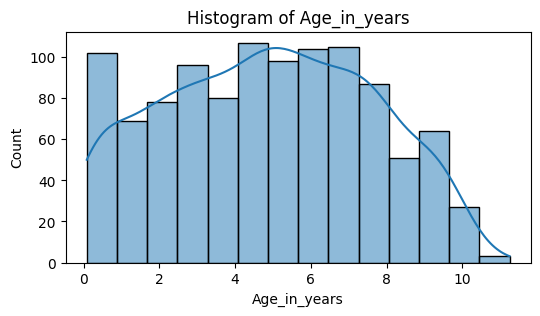

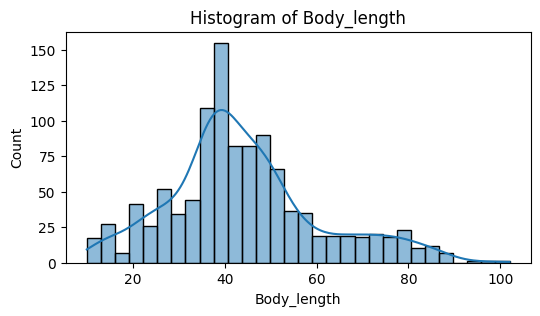

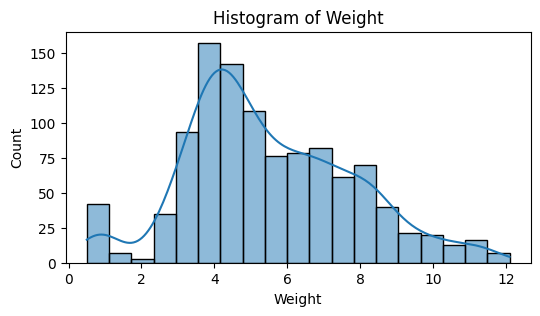

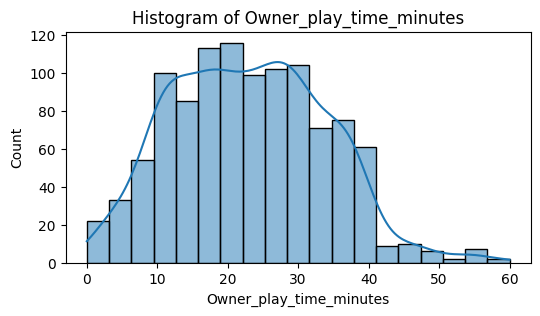

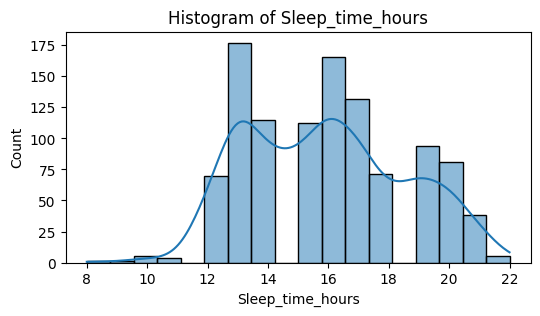

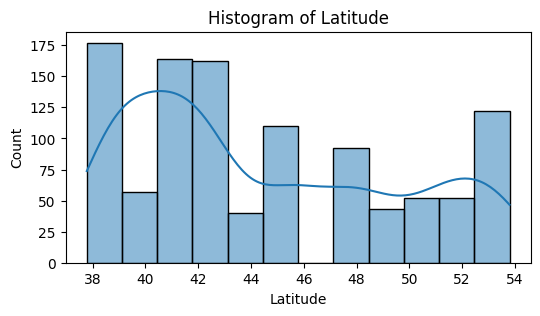

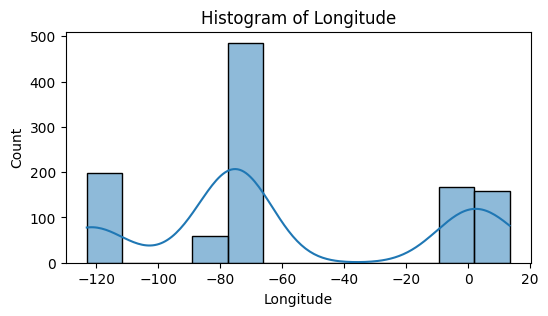

In [8]:
# Histograms for numerical features
num_cols = ['Age_in_years', 'Body_length', 'Weight', 'Owner_play_time_minutes', 'Sleep_time_hours', 'Latitude', 'Longitude']
df = clean  # Use clean data for EDA

for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

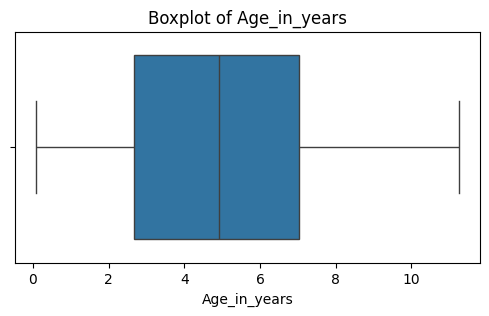

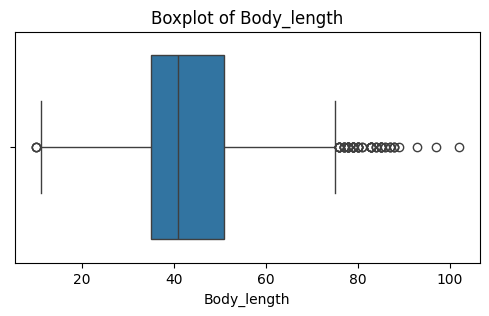

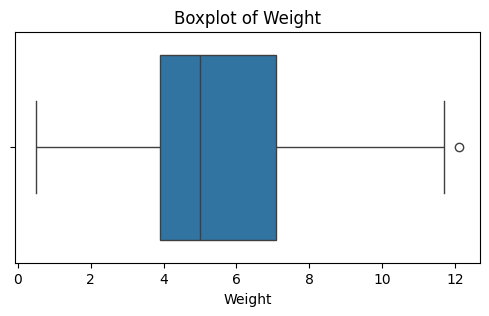

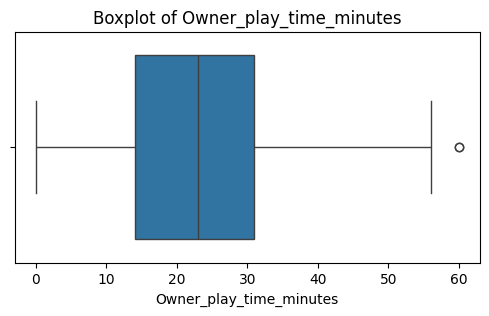

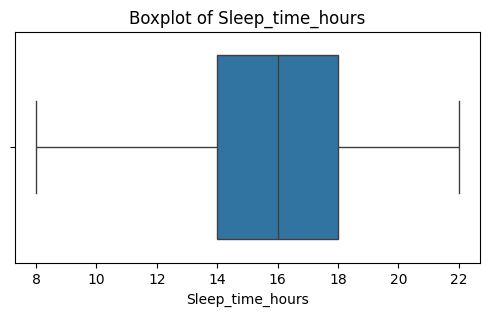

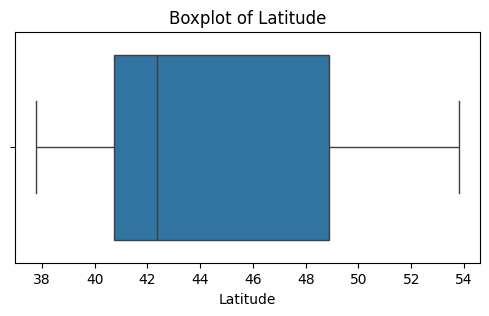

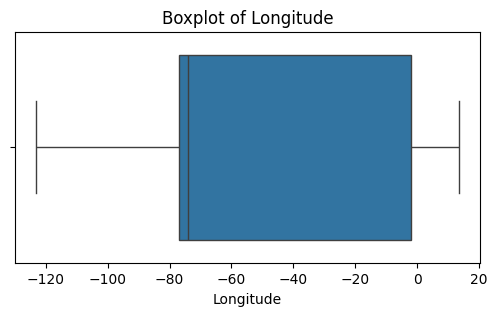

In [9]:
# Boxplots for outlier detection
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

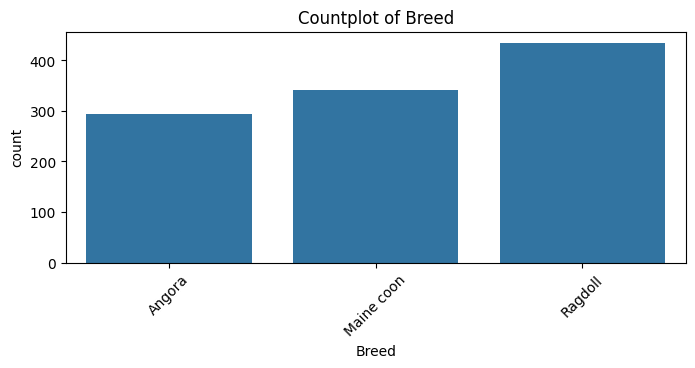

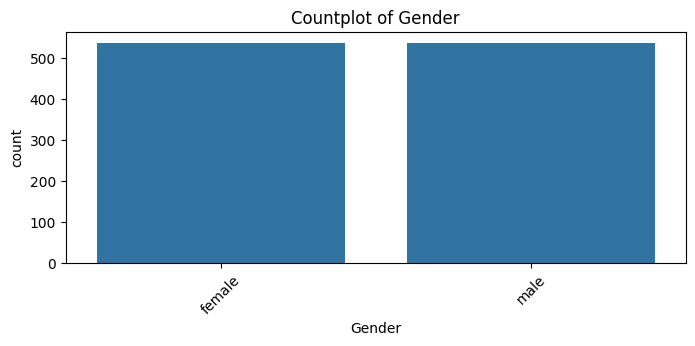

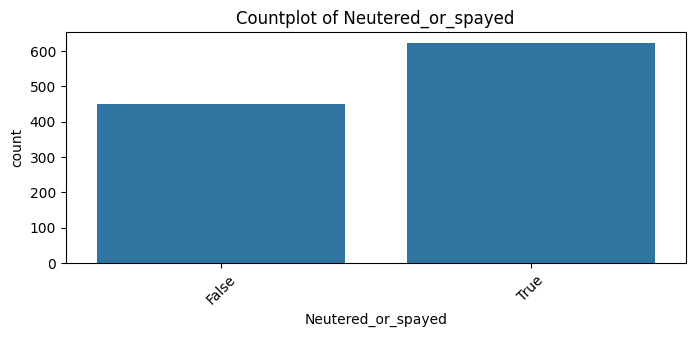

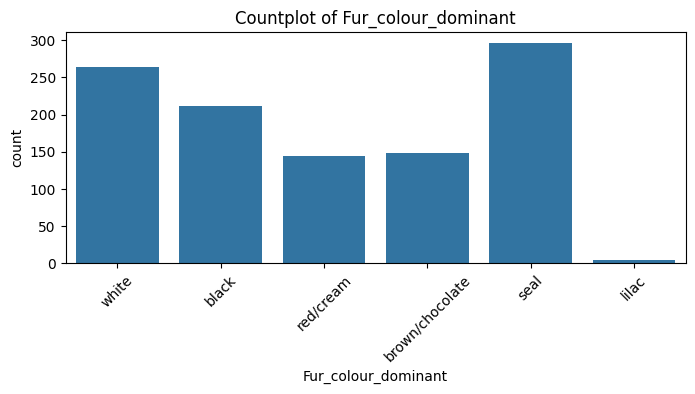

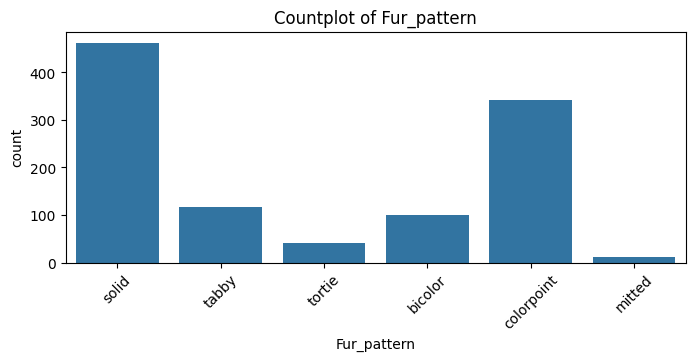

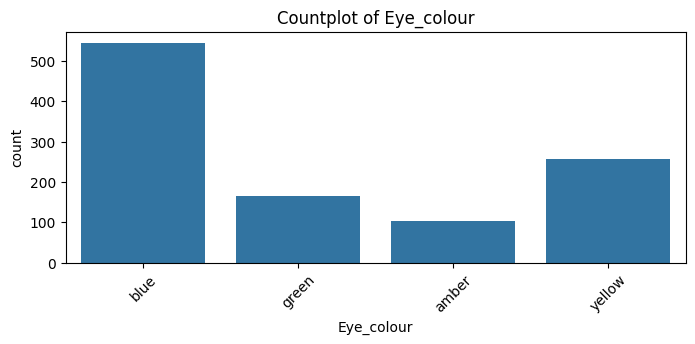

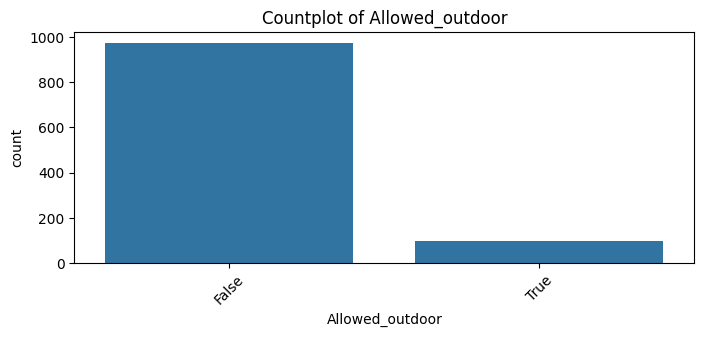

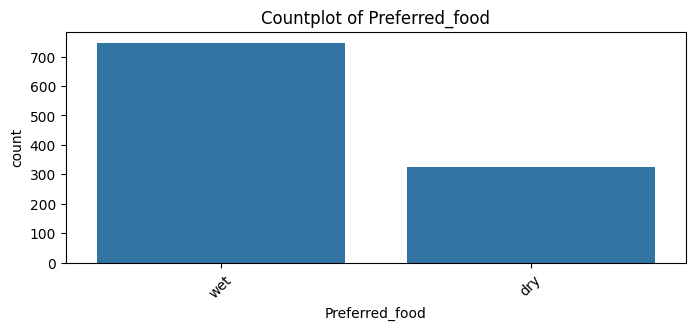

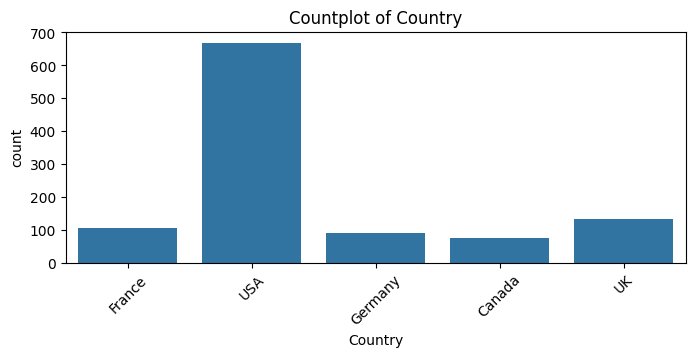

In [10]:

# Countplot for categorical features
cat_cols = ['Breed', 'Gender', 'Neutered_or_spayed', 'Fur_colour_dominant', 'Fur_pattern', 'Eye_colour', 'Allowed_outdoor', 'Preferred_food', 'Country']
for col in cat_cols:
    plt.figure(figsize=(8, 3))
    sns.countplot(x=df[col])
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Data Cleaning Steps

- Fixed inconsistent breed names (e.g., 'Ankora' → 'Angora')
- Handled missing values by imputing median for numerical columns and mode for categorical columns
- Standardized categorical values (e.g., 'france', 'France', 'La France!!!!' → 'France')
- Removed or corrected outliers (e.g., negative ages)
- Dropped rows with too many missing values

# Feature Importance & Model Selection

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [12]:
# Encode categorical variables
df_encoded = df.copy()
for col in cat_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

X = df_encoded.drop('Breed', axis=1)
y = df_encoded['Breed']

In [13]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))


Decision Tree Accuracy: 0.9627906976744186


In [15]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Random Forest Accuracy: 0.9720930232558139


In [16]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))


Logistic Regression Accuracy: 0.8651162790697674


/Users/waithira/.virtualenvs/mlzoomcamp/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


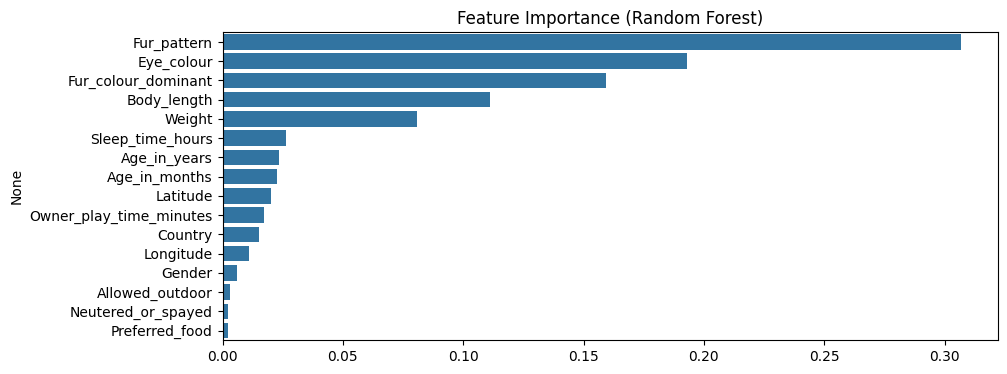

In [17]:
# Feature importance (Random Forest)
importances = rf.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 4))
sns.barplot(x=feat_importance.values, y=feat_importance.index)
plt.title('Feature Importance (Random Forest)')
plt.show()

In [18]:
# Model comparison
print("Decision Tree Report:\n", classification_report(y_test, dt_pred))
print("Random Forest Report:\n", classification_report(y_test, rf_pred))
print("Logistic Regression Report:\n", classification_report(y_test, lr_pred))


Decision Tree Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93        51
           1       0.97      0.93      0.95        81
           2       1.00      0.99      0.99        83

    accuracy                           0.96       215
   macro avg       0.96      0.96      0.96       215
weighted avg       0.96      0.96      0.96       215

Random Forest Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        51
           1       0.99      0.94      0.96        81
           2       1.00      0.99      0.99        83

    accuracy                           0.97       215
   macro avg       0.97      0.98      0.97       215
weighted avg       0.97      0.97      0.97       215

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.76      0.86      0.81        51
           1       0.93      0.86      0.90        81


In [19]:
# Parameter tuning example (Random Forest)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid.fit(X_train, y_train)
print("Best Random Forest Params:", grid.best_params_)
print("Best Random Forest Score:", grid.best_score_)

Best Random Forest Params: {'max_depth': None, 'n_estimators': 50}
Best Random Forest Score: 0.9778023146444199
